# Loan Eligibility Prediction Analysis and Model training/testing file

## Sanity Check

In [1]:
import warnings
warnings.filterwarnings('ignore')
from scripts.temp import temp_fun
temp_fun()

Confirming that relative imports work


## Fetch and Read the data

In [2]:
# Just import and run
from scripts.data_fetch import download_dataset
import pandas as pd

# Download
download_dataset()

# # Load data
df = pd.read_csv('data/Loan Eligibility Prediction.csv')  # adjust filename if needed
df.head()

Downloading: avineshprabhakaran/loan-eligibility-prediction
Dataset URL: https://www.kaggle.com/datasets/avineshprabhakaran/loan-eligibility-prediction
Downloaded to ./data/


,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y


## Data Validation

In [3]:
from data_validation import DataValidation

validator = DataValidation(
    DATA_PATH="data/Loan Eligibility Prediction.csv",
    TARGET_COL="Loan_Status"
)

validator.validate_dataset()

-----Data validation completed successfully.-----


## Exploratory Data Analysis


### Description of data

The loan eligibility dataset contains information on individual loan applicants and the outcomes of their applications. It includes demographic attributes such as gender, marital status, education level, and number of dependents, along with financial features including applicant income, co-applicant income, loan amount, and loan term. The dataset also records credit history and property area, both of which are key indicators of loan risk and eligibility. The target variable indicates whether each loan was approved or denied. Together, these variables provide a structured view of applicant characteristics and financial profiles, enabling analysis of loan approval patterns and the development of predictive models.

### Statement of Problem

The goal of this classification problem is to develop a predictive model that determines whether a loan application will be approved or denied based on applicant characteristics and financial information. Using features such as gender, education level, number of dependents, income, loan amount, credit history, and property area, the objective is to learn patterns that distinguish approved applications from rejected ones. The resulting model should accurately classify new loan applications and provide insight into the factors that most strongly influence approval decisions.



In what follows we provide an exploratory data analysis to better understand the dataset.  
Below are some raw information about the dataset including the feature types and some statistics associated with the fields.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         614 non-null    int64  
 1   Gender              614 non-null    object 
 2   Married             614 non-null    object 
 3   Dependents          614 non-null    int64  
 4   Education           614 non-null    object 
 5   Self_Employed       614 non-null    object 
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         614 non-null    int64  
 9   Loan_Amount_Term    614 non-null    int64  
 10  Credit_History      614 non-null    int64  
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 62.5+ KB


In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Customer_ID,614.0,NaN,NaN,NaN,307.5,177.3908,1.0,154.25,307.5,460.75,614.0
Gender,614,2,Male,499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,614,2,Yes,399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,614.0,NaN,NaN,NaN,0.8567,1.2167,0.0,0.0,0.0,2.0,4.0
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,614,2,No,523,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Applicant_Income,614.0,NaN,NaN,NaN,5403.4593,6109.0417,150.0,2877.5,3812.5,5795.0,81000.0
Coapplicant_Income,614.0,NaN,NaN,NaN,1621.2458,2926.2484,0.0,0.0,1188.5,2297.25,41667.0
Loan_Amount,614.0,NaN,NaN,NaN,142.0228,87.0831,9.0,98.0,125.0,164.75,700.0
Loan_Amount_Term,614.0,NaN,NaN,NaN,338.8925,69.7164,12.0,360.0,360.0,360.0,480.0


There no missing values in the dataset, but our data processing handles missing values. 

In [5]:
pd.DataFrame(df.isna().sum(), columns=['missing_values'])

,missing_values
Customer_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
Applicant_Income,0
Coapplicant_Income,0
Loan_Amount,0
Loan_Amount_Term,0


The target which is the `Loan_status` has the following distribution. The sample is somewhat imbalanced, and we will discuss that in our model training and testing.

In [6]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

As we saw above the dataset has multiple types of features that we categorize as follows:

In [7]:
numerical_features = ['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Loan_Amount_Term', 'Dependents']
categorical_features = ['Property_Area']
binary_features = ['Credit_History', 'Gender', 'Married', 'Education', 'Self_Employed']
drop_features = ['Customer_ID']
target_name = 'Loan_Status'

In [8]:
from scripts.EDA import EDA
eda = EDA()

In [9]:
eda.univariate_feature_distributions(
    data=df,
    column_names=numerical_features
)

alt.HConcatChart(...)

`Application_Income` and `Coapplication_Income` exibit right skewed distributions as is common with this type of variable. `Loan_Amount` has a distribution closer to *Normal* but still has a heavy right tail. The loan terms are concentrated around 3-year. The number of dependents are also mostly concentraded on $0$. In our analysis we treat the `Dependent` feature as numerical, but it can also be thought of as a categorical feature.  

An examination of the categorical features reveals several notable differences between approved and rejected loan applications. Property area shows distinct variation across classes: applicants from “*Semiurban*” areas have a noticeably higher approval rate, while those from “*Rural*” areas are more likely to be denied. Credit history is the strongest differentiator in the dataset; applicants with a positive credit history overwhelmingly fall into the approved class, whereas those with no credit history are predominantly rejected, confirming its central role in loan eligibility decisions.

Demographic features exhibit more modest effects. Gender shows a slight skew toward higher approval rates for male applicants, although the difference is not substantial. Married applicants tend to receive approvals more often than unmarried ones, suggesting that household structure may influence perceived creditworthiness or financial stability. Educational background also shows variation: graduates have higher approval rates than non-graduates, reflecting a possible association between education level and financial reliability. Finally, individuals who are self-employed experience a lower approval rate compared with salaried applicants, consistent with the higher income variability typically associated with self-employment.

Overall, `Credit_History`, `Property_Area`, and `Married` status appear to be the most influential categorical features in distinguishing between approved and denied applications, while `Gender`, `Education`, and `Self_Employed` provide weaker but still observable patterns.

In [10]:
eda.compare_categorical_features(
    data=df,
    categorical_cols=categorical_features+binary_features,
    target_name=target_name
)

alt.VConcatChart(...)

The density plots for the numerical features highlight meaningful differences between approved and rejected loan applications. `Applicant_Income` and `Coapplicant_Income` both exhibit right-skewed distributions, but approved applicants tend to have slightly higher incomes, suggesting that stronger earning capacity improves approval likelihood. `Loan_Amount` shows a similar pattern: approved applications are more concentrated at moderate loan sizes, whereas rejected applications display a flatter, more dispersed distribution, indicating a higher rejection rate for larger or less typical loan amounts. `Loan_Term` is more uniform across both classes, though standard loan terms appear marginally more common among approved applicants. Together, these density comparisons suggest that income and loan amount provide more discriminative power between the two classes, while loan term contributes comparatively less to separation.

In [11]:
eda.density_feature_plots(
    data=df,
    numerical_cols=numerical_features,
    target=target_name,
    columns=3
)

alt.VConcatChart(...)

The boxplots of the numerical features across the two classes confirm the above-mentioned finding in a new light. `Applicant_Income` and `Coapplicant_Income` show wider distributions for approved applications, indicating that applicants with stronger or more stable earnings are more likely to be approved. `Loan_Amount` displays a noticeably fatter right tail for approved cases, though with considerable overlap between the classes. In contrast, `Loan_Term` exhibits similar quartiles across both groups, suggesting that loan duration does not meaningfully differentiate approved from rejected applications. Overall, the boxplots reinforce that income-related features and loan amount contribute more substantially to loan approval outcomes, while loan term plays a limited role.

In [12]:
eda.boxplot_feature_plots(
    data=df,
    numerical_cols=numerical_features,
    target=target_name,
    columns=3
)

alt.VConcatChart(...)

The correlation heat map shows that the numerical features in the dataset mostly exhibit modest relationships with one another, with most correlations falling in the weak to moderate range. `Applicant_Income` and `Coapplicant_Income` show a mild negative association, reflecting that households with higher primary incomes might have lower secondary incomes. `Loan_Amount` is moderately correlated with `Applicant_Income`, indicating that higher-income applicants tend to seek larger loans. `Loan_Term` shows little correlation with any of the income or loan amount variables, suggesting that the duration of a loan is chosen largely independently of an applicant’s income or requested amount. Overall, the heat map indicates that the numerical features do not exhibit strong collinearity, making them suitable for use together in predictive modeling without concerns about severe multicollinearity.

In [13]:
eda.correlation_plot(
    data=df, 
    column_names=numerical_features)

alt.LayerChart(...)

## Model Training 

In [14]:
from scripts.model_train import *

# Preprocess
X_train, X_test, y_train, y_test, features, scaler = preprocess_data(df)

# Train and save model
model = train_classifier(X_train, y_train)


 Data preprocessed with one-hot encoding
  Training samples: 491
  Testing samples: 123
  Number of features: 12
  Target distribution - Approved: 422, Rejected: 192

Training Logistic Regression...

Model trained successfully
  Training Accuracy: 0.8086

Model saved to: models/logistic_regression_model.pkl


## Model Testing

In [15]:
from sklearn.model_selection import cross_validate


# Cross-validation with classification metrics
classification_metrics = ["accuracy", "precision", "recall", "f1"]
cross_val_results = pd.DataFrame(cross_validate(model, X_train, y_train, scoring=classification_metrics)).agg(['mean', 'std']).round(3).T
cross_val_results

,mean,std
fit_time,0.004,0.002
score_time,0.005,0.002
test_accuracy,0.808,0.030
test_precision,0.791,0.020
test_recall,0.979,0.025
test_f1,0.875,0.020


## Accuracy Score

In [16]:
# Accuracy Score
accuracy_score = model.score(X_test, y_test)
accuracy_score

0.8048780487804879

## Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

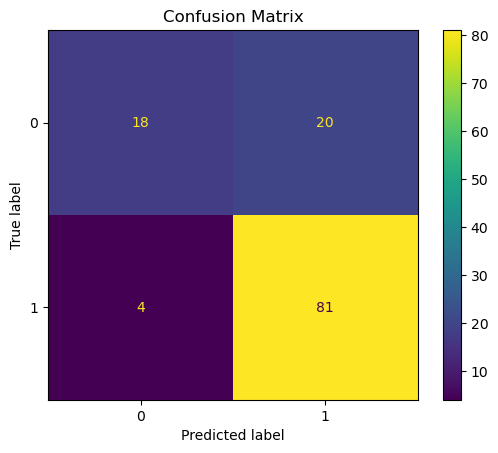

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix
confmat = ConfusionMatrixDisplay.from_estimator(
    model,
    X_test,
    y_test,
)
confmat.ax_.set_title("Confusion Matrix")

Based on the confusion matrix, we can derive several key performance metrics for our loan eligibility prediction model. The model correctly predicted 18 loan denials and 81 loan approvals. The model incorrectly predicted 20 loan denials as approvals (false positives) and 4 loan approvals as denials (false negatives). From this, we can see that the model is better at predicting approvals than denials. Depending on the business context, we may prefer to minimize the false negatives to avoid losing out on potential customers who would have been approved for loans. But, we also need to consider the cost of false positives and minimizing the number of bad loans approved. 

## Classification Report

In [18]:
from sklearn.metrics import classification_report

# Classification Report
report = pd.DataFrame(classification_report(y_test, model.predict(X_test), output_dict=True))
report.rename(columns={'0': False, '1': True}, inplace=True)
report

,False,True,accuracy,macro avg,weighted avg
precision,0.8182,0.8020,0.8049,0.8101,0.8070
recall,0.4737,0.9529,0.8049,0.7133,0.8049
f1-score,0.6000,0.8710,0.8049,0.7355,0.7873
support,38.0000,85.0000,0.8049,123.0000,123.0000


From the classification report, we can see that the false precision is 0.82. Meaning that when the model predicts a loan will be denied, it is correct 82% of the time. The recall is 0.47, meaning that the model correctly identifies 47% of all actual loan denials. The true precision is 0.80, meanin gthat when the model predicts a loan will be apporved, it is correct 80% of the time. The recall is 0.95, meaning that the model correctly identifies 95% of all actual loan approvals. From the weighted average column, we can see the overall accuracy of the model is 0.80, meaning that the model correctly predicts loan eligibility 80% of the time.

## Precision Recall Curve

Text(0.5, 1.0, 'Precision-Recall curve')

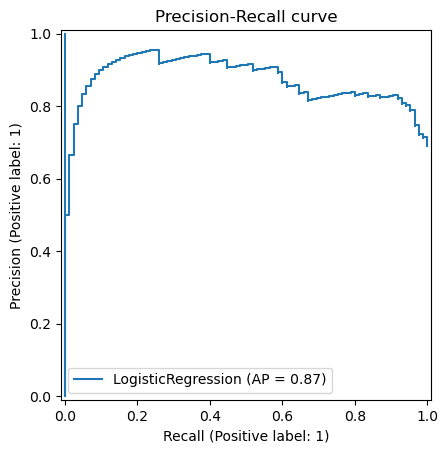

In [19]:
from sklearn.metrics import PrecisionRecallDisplay

# Precision Recall Curve
disp = PrecisionRecallDisplay.from_estimator(
    model,
    X_test,
    y_test
)
disp.ax_.set_title("Precision-Recall curve")

From the precision-recall curve, we can see that as we increase the recall, the precision remains high. The AP score is 0.87. This indicates good performance of the model in identifying loan approvals. 

## ROC Curve

Text(0.5, 1.0, 'ROC Curve')

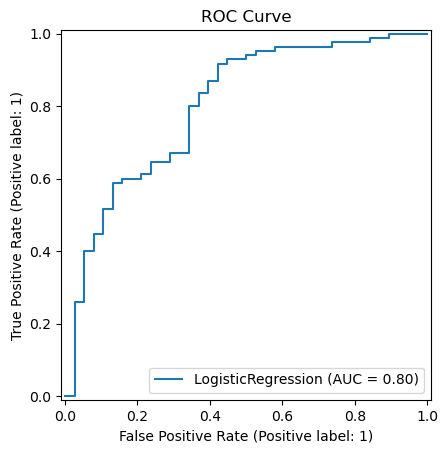

In [20]:
from sklearn.metrics import RocCurveDisplay

# ROC Curve
roc_disp = RocCurveDisplay.from_estimator(
    model,
    X_test,
    y_test
)
roc_disp.ax_.set_title("ROC Curve")

We can see from the ROC curve and the AUC score of 0.80 that the model has good ability to distinguish between approved and denied loan applications. The score suggests that while the model is effective at distinguishing between the two classes, there is still room for improvement for its predictive performance.

## References

Dataset Source: [Kaggle Loan Prediction Dataset](https://www.kaggle.com/datasets/avineshprabhakaran/loan-eligibility-prediction)

ChatGPT helped us restructure and better present the data analysis section.

MDS DSCI 522 Textbook: [Link](https://ubc-dsci.github.io/reproducible-and-trustworthy-workflows-for-data-science/)

Reference to Data Visualizations: Machine Learning an Algorithmic Perspective by Stephen Marsland




